In [16]:
import os
import csv
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
sleep_data = Path('Sleep_health_and_lifestyle_dataset.csv')
sleep_df = pd.read_csv(sleep_data)
sleep_df.head(20)
    

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [5]:
sleep_df['BMI Category'] = sleep_df['BMI Category'].replace({'Normal Weight':'Normal'})
sleep2_df = sleep_df.loc[sleep_df['Sleep Disorder']!='Insomnia',:]
sleep2_df = sleep2_df.loc[sleep2_df['Sleep Disorder']!='Sleep Apnea',:]
sleep2_df.head(20)


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
10,11,Male,29,Doctor,6.1,6,30,8,Normal,120/80,70,8000,NaN
11,12,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
12,13,Male,29,Doctor,6.1,6,30,8,Normal,120/80,70,8000,NaN
13,14,Male,29,Doctor,6.0,6,30,8,Normal,120/80,70,8000,NaN


In [19]:
x = sleep_df['Stress Level']
y = sleep_df['Quality of Sleep']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))



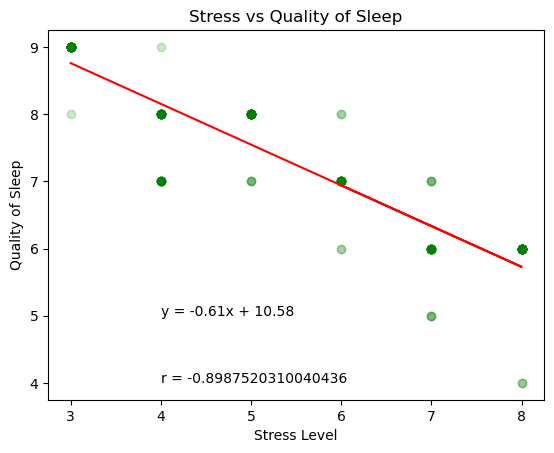

In [29]:
plt.scatter(sleep_df['Stress Level'],sleep_df['Quality of Sleep'],alpha=.1,color="green")
plt.plot(x,regress_values,"-r")
plt.annotate(line_eq,(4,5))
plt.annotate(f"r = {rvalue}",(4,4))
plt.title("Stress vs Quality of Sleep")
plt.ylabel("Quality of Sleep")
plt.xlabel("Stress Level")
plt.show()

In [30]:

MedSD = sleep_df['Sleep Duration'].median()
MedQS = sleep_df['Quality of Sleep'].median()
print(MedQS,MedSD)
sleep_df.describe()

7.0 7.2


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


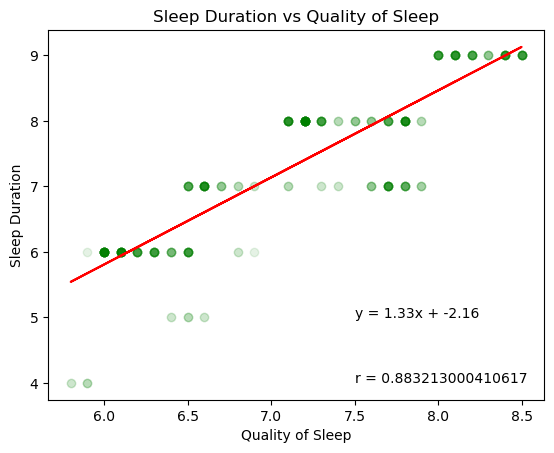

In [33]:
x = sleep_df['Sleep Duration']
y = sleep_df['Quality of Sleep']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

Duration_Quality = sleep_df[['Sleep Duration','Quality of Sleep']]
Duration_Quality = Duration_Quality.set_index("Sleep Duration")
plt.scatter(sleep_df['Sleep Duration'],sleep_df['Quality of Sleep'],alpha=.1,color="green")
plt.plot(x,regress_values,"-r")
plt.annotate(line_eq,(7.5,5))
plt.annotate(f"r = {rvalue}",(7.5,4))
plt.title("Sleep Duration vs Quality of Sleep")
plt.ylabel("Sleep Duration")
plt.xlabel("Quality of Sleep")
plt.show(